# Clustering Task Data Preparation
## Importing Necessary Libraries
In this notebook, we prepare our data for a subsequent clustering task. We start by importing necessary libraries, each serving a specific purpose in our data preparation process:

- `numpy` and `pandas`: These libraries are essential for handling and manipulating our data.
- `datetime`: This library is used for handling date and time data, which are crucial features in our dataset.
- `geopandas`: This library allows us to work with geographic data, which is significant given the spatial nature of our taxi trips data.
- `seaborn` and `matplotlib.pyplot`: These libraries are used for data visualization, helping us understand the distribution and relationships of our data.
- `gc`: This library provides a garbage collection module for managing memory usage.
- `pickle`: We use this library for loading and saving data in pickle format, a common format for serializing and deserializing Python object structures.



In [1]:
import numpy as np
import pandas as pd
import datetime
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

import gc
import pickle

from google.colab import drive
from google.colab import data_table
data_table.enable_dataframe_formatter()

from IPython.display import display, clear_output
import time

import warnings
warnings.filterwarnings('ignore')

## Loading Data from Google Drive
In this section, we access our dataset stored on Google Drive. The dataset is a Pickle file containing taxi trip data. We load this data into a pandas DataFrame, which offers a multitude of functions and methods for efficient data manipulation and analysis. This DataFrame will serve as the foundation for our data preparation.



In [2]:
drive.mount('/content/drive')
pickle_file_path = '/content/drive/MyDrive/3A23/Data/trips_2013.pkl'

# Load the Pickle file into a Pandas DataFrame
with open(pickle_file_path, 'rb') as file:
    df_trips = pickle.load(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import geojson files (Point of Interest)
gdf1 = gpd.read_file('/content/drive/MyDrive/3A23/Data/tourism_polygon.geojson')
gdf2 = gpd.read_file('/content/drive/MyDrive/3A23/Data/entertainment_polygon.geojson')
gdf = pd.concat([gdf1, gdf2], ignore_index=True)

census_tract_boundaries = gpd.read_file('/content/drive/MyDrive/3A23/Data/chicago_census_tracts.geojson')

## DataFrame Overview
To get a clear understanding of our data, we inspect the basic structure and properties of our DataFrame. This includes the number of entries (rows), the count of non-null values for each column, and the data type of each column. This initial overview allows us to plan necessary preprocessing steps such as handling missing values and data type conversions.



In [4]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8449592 entries, 0 to 8449591
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   start_time          datetime64[ns]
 1   end_time            datetime64[ns]
 2   duration            float64       
 3   distance            float64       
 4   start_location      object        
 5   start_lat           float64       
 6   start_long          float64       
 7   end_location        object        
 8   end_lat             float64       
 9   end_long            float64       
 10  start_census_tract  int64         
 11  end_census_tract    int64         
 12  h3_hex_6            object        
 13  h3_hex_7            object        
 14  h3_hex_8            object        
 15  trip_id             object        
 16  taxi_id             object        
 17  company             object        
 18  payment_type        object        
 19  fare                float64       
 20  ex

## Checking for Missing Values
In this section, we inspect our DataFrame for any missing values (NaNs). Identifying and appropriately handling these missing values is a crucial step in data preprocessing as they can significantly impact the performance and accuracy of our subsequent analysis.



In [5]:
df_trips[df_trips.isna().any(axis=1)]

,start_time,end_time,duration,distance,start_location,start_lat,start_long,end_location,end_lat,end_long,...,h3_hex_8,trip_id,taxi_id,company,payment_type,fare,extras,tips,tolls,trip_total
0,2013-01-01 00:00:00,2013-01-01 00:15:00,480.0,8.851392,POINT (-87.6188683546 41.8909220259),41.890922,-87.618868,POINT (-87.65243499970002 41.9672886138),41.967289,-87.652435,...,882664c1e3fffff,10508745a1069e9cdaad8760a6a243dc924cc0f2,e5c165fcc578673a02367d8d379846b48b00fbacf7f1b4...,NaN,Cash,13.25,0.0,0.0,0.0,13.25
3,2013-01-01 00:00:00,2013-01-01 00:15:00,600.0,7.081114,POINT (-87.6517705068 41.9426918444),41.942692,-87.651771,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,...,882664c163fffff,6d041f951ccf8d799e676ddc4d387bc65efb2484,b1b569038610549b618e4fe62e3379b25606f7a3fc6f30...,NaN,Cash,11.45,2.0,0.0,0.0,13.45
8,2013-01-01 00:00:00,2013-01-01 00:30:00,1080.0,9.173261,POINT (-87.671445766 41.9192250505),41.919225,-87.671446,POINT (-87.6422063127 41.9305785697),41.930579,-87.642206,...,882664c127fffff,a5d2b64e2abd89de5ae2fa6834105592837adc8e,db2b8395d8bda6438c3ab1ae7ba91be2a903e6c2cce2fa...,NaN,Cash,15.25,1.5,0.0,0.0,16.75
9,2013-01-01 00:00:00,2013-01-01 00:15:00,420.0,1.770278,POINT (-87.6308650266 41.9058577688),41.905858,-87.630865,POINT (-87.6318639497 41.8920421365),41.892042,-87.631864,...,882664c1edfffff,7d17fe45e589ab4eaf924d8ce9dfd930e923cac4,c919d98199b7fa55523eb8ce4107c36f03abc8e907d29b...,NaN,Cash,6.25,0.0,0.0,0.0,6.25
11,2013-01-01 00:00:00,2013-01-01 00:15:00,360.0,1.770278,POINT (-87.6291051864 41.9002212967),41.900221,-87.629105,POINT (-87.6378442095 41.8932163595),41.893216,-87.637844,...,882664c1edfffff,34fb3ff9aaba0df3d27bf9dcaae2b5fea43905a6,97ca0053c7078857a1faa9bfa7bae198efd41874bc267c...,NaN,Cash,5.85,1.5,0.0,0.0,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449586,2013-12-31 23:45:00,2014-01-01 00:00:00,720.0,7.563917,POINT (-87.6499072264 41.9049353016),41.904935,-87.649907,POINT (-87.6537566193 41.8634226841),41.863423,-87.653757,...,882664c137fffff,a389ee24a6a6ef09ec9f7cb27b85dae8486a6984,a10539d2dd36e2367b15e1724fab054677f286a13b262d...,NaN,Cash,12.25,0.0,0.0,0.0,12.25
8449587,2013-12-31 23:45:00,2013-12-31 23:45:00,416.0,1.931213,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,...,882664c1e1fffff,24776474f25efd0a7b63a248f4d64bebedd884aa,07009b8e9b32f36656567f7809b970af38e59dbb58704a...,Flash Cab,Cash,6.25,2.0,0.0,NaN,8.25
8449588,2013-12-31 23:45:00,2014-01-01 00:15:00,2460.0,10.943539,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6573411073 41.9727095466),41.972710,-87.657341,...,882664c1e1fffff,8e88ced92be1b1941cc34556db38f39c0a1de70c,35057a271731c5b976bda25efe85aa0c1901d0a5fc9ba2...,NaN,Cash,21.65,0.0,0.0,0.0,21.65
8449590,2013-12-31 23:45:00,2013-12-31 23:45:00,240.0,0.643738,POINT (-87.6291051864 41.9002212967),41.900221,-87.629105,POINT (-87.6288741572 41.8920726347),41.892073,-87.628874,...,882664c1edfffff,0524b962dbcb18352ee3a2cda36faead14872b14,5338c9353dcc39794670b869abb72d264d74450715ae57...,NaN,Cash,4.45,2.5,0.0,0.0,6.95


In [6]:
df_trips.columns[df_trips.isna().any()]

Index(['company', 'fare', 'extras', 'tips', 'tolls', 'trip_total'], dtype='object')

## Handling Missing Values
Here, we handle missing values in our DataFrame. For the 'company' column, we fill NaN values with 'Unknown' as we don't have any information about the company for these records. For the 'fare', 'extras', 'tips', and 'tolls' columns, we replace NaNs with values calculated based on reasonable assumptions. Appropriately handling these missing values ensures the integrity of our dataset and prevents potential errors during our subsequent analysis.



In [7]:
# Fill company related NaN values with "Unknown"
df_trips['company'].fillna('Unknown', inplace=True)

# Filter instances with valid fare and distance values
valid_instances = df_trips[['fare']].notna().all(axis=1)

# Calculate the average cost per km for valid instances
average_cost_per_km = (df_trips.loc[valid_instances, 'fare'] / df_trips.loc[valid_instances, 'distance']).mean()

# Clean up memory
del valid_instances
gc.collect()

# Fill fare NaN values using the average cost per km
df_trips['fare'].fillna(df_trips['distance'] * average_cost_per_km, inplace=True)

# Fill NaN values in extras, tips, and tolls with their respective means
for col in ['extras', 'tips', 'tolls']:
    df_trips[col].fillna(df_trips[col].mean(), inplace=True)

# Calculate the total_cost only for instances where it is NaN
df_trips.loc[df_trips['trip_total'].isna(), 'trip_total'] = (
    df_trips['fare'] + df_trips['extras'] + df_trips['tips'] + df_trips['tolls']
)


In [8]:
df_trips[df_trips.isna().any(axis=1)].count()

start_time            0
end_time              0
duration              0
distance              0
start_location        0
start_lat             0
start_long            0
end_location          0
end_lat               0
end_long              0
start_census_tract    0
end_census_tract      0
h3_hex_6              0
h3_hex_7              0
h3_hex_8              0
trip_id               0
taxi_id               0
company               0
payment_type          0
fare                  0
extras                0
tips                  0
tolls                 0
trip_total            0
dtype: int64

## Adding Distance Features
In this part, we enrich our dataset with additional features related to distances to points of interest (POIs). We believe these features could be indicative of the purpose of the trip, possibly helping distinguish between different types of customers. Therefore, we introduce 'min_distance_to_poi_start' and 'min_distance_to_poi_end' features, representing the minimum distances from the start and end locations of each trip to certain POIs. These features could potentially aid in distinguishing meaningful clusters in our data.


In [9]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Get the centroid of each polygon and convert to list of tuples (latitude, longitude)
points_of_interest = [(pt[1], pt[0]) for pt in [list(polygon.centroid.coords)[0] for polygon in gdf['geometry']]]

# Convert latitude and longitude to radians
points_of_interest_rad = [np.array([radians(pt[0]), radians(pt[1])]) for pt in points_of_interest]

# Function to calculate minimum haversine distance
def min_haversine(lat, lon, points_of_interest_rad):
    loc_rad = np.array([radians(lat), radians(lon)])
    return min(haversine_distances([loc_rad], points_of_interest_rad)[0]) * 6371000/1000 # convert to kilometers

# Set chunk size due to limited RAM
chunk_size = 100000
chunks = [x for x in range(0, df_trips.shape[0], chunk_size)]

# Placeholder for results
min_distance_to_poi_start = pd.Series(dtype='float64')
min_distance_to_poi_end = pd.Series(dtype='float64')

# Loop over chunks and calculate min_distance_to_poi for each chunk
for i in range(len(chunks)-1):

    display(f'Processing chunk {i+1}/{len(chunks)-1}') # Progress tracker
    clear_output(wait=True)

    df_chunk = df_trips.iloc[chunks[i]:chunks[i+1]]
    min_distance_chunk_start = df_chunk.apply(lambda row: min_haversine(row['start_lat'], row['start_long'], points_of_interest_rad), axis=1)
    min_distance_to_poi_start = pd.concat([min_distance_to_poi_start, min_distance_chunk_start])
    min_distance_chunk_end = df_chunk.apply(lambda row: min_haversine(row['end_lat'], row['end_long'], points_of_interest_rad), axis=1)
    min_distance_to_poi_end = pd.concat([min_distance_to_poi_end, min_distance_chunk_end])

# last chunk
df_chunk = df_trips.iloc[chunks[-1]:]
min_distance_chunk_start = df_chunk.apply(lambda row: min_haversine(row['start_lat'], row['start_long'], points_of_interest_rad), axis=1)
min_distance_to_poi_start = pd.concat([min_distance_to_poi_start, min_distance_chunk_start])
min_distance_chunk_end = df_chunk.apply(lambda row: min_haversine(row['end_lat'], row['end_long'], points_of_interest_rad), axis=1)
min_distance_to_poi_end = pd.concat([min_distance_to_poi_end, min_distance_chunk_end])

# Assign the results back to the dataframe
df_trips['min_distance_to_poi_start'] = min_distance_to_poi_start.values
df_trips['min_distance_to_poi_end'] = min_distance_to_poi_end.values

# Clear RAM
del df_chunk, min_distance_to_poi_start, min_distance_chunk_start, min_distance_to_poi_end, min_distance_chunk_end
gc.collect()

0

## Adding POI Count Features
Continuing our feature engineering process, we introduce 'poi_count_start' and 'poi_count_end'. These features represent the concentration of points of interest at the start and end locations of the trips. We hypothesize that the density of POIs could influence trip patterns and behaviors, making these features potentially useful for our clustering task.


In [10]:
# Reproject the gdf GeoDataFrame to have the same CRS as census_tract_boundaries
gdf_reprojected = gdf.to_crs(census_tract_boundaries.crs)

# For start_census_tract and end_census_tract
for census_tract_col in ['start_census_tract', 'end_census_tract']:
    # Create an empty list to store the corresponding census tract for each polygon
    census_tract_list = []

    # Iterate through each polygon in the gdf GeoDataFrame
    for polygon in gdf_reprojected['geometry']:
        # Check which census tract contains the polygon
        mask = census_tract_boundaries.contains(polygon)
        census_tract = census_tract_boundaries[mask]['geoid10'].values
        if len(census_tract) > 0:
            census_tract_list.append(census_tract[0])
        else:
            census_tract_list.append(None)

    # Add the census tract information to the gdf_reprojected GeoDataFrame
    gdf_reprojected['census_tract'] = census_tract_list

    # Drop rows with missing values in 'census_tract' column in gdf_reprojected
    gdf_reprojected.dropna(subset=['census_tract'], inplace=True)

    # Convert 'census_tract' column in gdf_reprojected to int64
    gdf_reprojected['census_tract'] = gdf_reprojected['census_tract'].astype(int)

    # Group by 'census_tract' and count the number of points of interest per census tract
    poi_count_per_tract = gdf_reprojected.groupby('census_tract').size().reset_index(name='poi_count')

    # Merge the poi_count_per_tract back to the df_trips DataFrame
    df_trips = pd.merge(df_trips, poi_count_per_tract, left_on=census_tract_col, right_on='census_tract', how='left')

    # Rename the 'poi_count' column to 'poi_count_start' or 'poi_count_end'
    df_trips.rename(columns={'poi_count': 'poi_count_' + census_tract_col.split('_')[0]}, inplace=True)

    # Fill NA values with 0 in the newly created 'poi_count_start' or 'poi_count_end' column
    df_trips['poi_count_' + census_tract_col.split('_')[0]] = df_trips['poi_count_' + census_tract_col.split('_')[0]].fillna(0)

    # Drop the 'census_tract' column
    df_trips.drop(columns='census_tract', inplace=True)

## Identifying Airport Trips
Given that airports are significant transportation hubs, we suspect that trips to and from airports might exhibit unique characteristics. Therefore, we introduce a new binary feature, 'airport_trip', to indicate whether a trip is associated with an airport. This feature might reveal specific clusters related to airport commutes.


In [11]:
df_trips['airport_trip'] = ((df_trips['start_census_tract'] == 17031980000) | (df_trips['start_census_tract'] == 17031980100) |
                            (df_trips['end_census_tract'] == 17031980000) | (df_trips['end_census_tract'] == 17031980100)).astype(int)

## Indicating Special Dates
We hypothesize that trips occurring on special dates (e.g., festivals or parades) may exhibit different characteristics compared to regular trips. Therefore, we introduce 'is_special_date', a binary feature that indicates whether a trip happened on a significant date in Chicago's event calendar. Identifying these trips can potentially reveal clusters associated with special events and holidays. We therfore take into account:

* Saint Patrick's Day Parade: March 16, 2013 (The Chicago River was dyed green on this day)
* Memorial Day Parade: May 25, 2013
* Grant Park Music Festival: June 12 - August 17, 2013
* Chicago Pride Parade: June 30, 2013
* Taste of Chicago: July 10 - 14, 2013
* Chicago Air and Water Show: August 17 - 18, 2013
* Chicago Marathon: October 13, 2013
* Thanksgiving Day Parade: November 28, 2013
* Magnificent Mile Lights Festival: November 23, 2013
* New Year's Eve Celebrations: December 31, 2013



In [12]:
special_dates = pd.to_datetime(['2013-03-16', '2013-05-25', '2013-06-12', '2013-08-17', '2013-06-30', '2013-07-10', '2013-07-11', '2013-07-12', '2013-07-13', '2013-07-14', '2013-08-17', '2013-08-18', '2013-10-13', '2013-11-28', '2013-11-23', '2013-12-31'])
df_trips['is_special_date'] = df_trips['start_time'].dt.floor('D').isin(special_dates).astype(int)

## Extracting Time-Related Features
Temporal patterns can often play a crucial role in understanding taxi demand. Therefore, we extract several time-related features from the start time of the trips. These features can provide insights into patterns like peak hours, off-hours, weekday vs. weekend demand, and seasonality, which could be instrumental in revealing meaningful clusters.


In [13]:
df_trips["hour"] = df_trips["start_time"].apply(lambda x: x.hour)
df_trips["week_day"] = df_trips["start_time"].apply(lambda x: x.weekday())
df_trips['is_weekend'] = df_trips['week_day'].apply(lambda x: 1 if x >= 5 else 0)
df_trips['part_of_day'] = df_trips['hour'].apply(lambda hour: 'Early Morning' if 0 <= hour < 5 else
                                                          'Morning' if 5 <= hour < 11 else
                                                          'Afternoon' if 11 <= hour < 16 else
                                                          'Evening' if 16 <= hour < 21 else
                                                          'Night')


## Adding Fare Efficiency Features
We introduce features such as 'cost per minute' and 'cost per mile' to gain insight into fare efficiency. These features can capture the economic aspects of the trips, potentially revealing patterns related to the cost-effectiveness of the trips. Such patterns could help identify clusters with similar fare efficiency characteristics.


In [14]:
df_trips['cost_per_minute'] = df_trips['fare'] / df_trips['duration']
df_trips['cost_per_km'] = df_trips['fare'] / df_trips['distance']

## Encoding Categorical Variables
Machine learning algorithms require numerical input. Therefore, we need to convert our categorical variables into numerical representations. Here, we apply one-hot encoding to the 'part_of_day' feature, creating separate binary features for each part of the day. For the 'payment_type' feature, we use label encoding, replacing each unique category with a distinct integer. These transformations enable us to use these categorical features in our subsequent clustering task.


In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Convert 'part_of_day' and 'company' into one-hot vectors
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df_trips[['part_of_day']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['part_of_day']))

# Concatenate one-hot encoded dataframe with the original dataframe
df_trips = pd.concat([df_trips, one_hot_df], axis=1)

# Convert 'payment_type' into numerical labels
label_encoder = LabelEncoder()
df_trips['payment_type_encoded'] = label_encoder.fit_transform(df_trips['payment_type'])

In [16]:
df_trips.head()

,start_time,end_time,duration,distance,start_location,start_lat,start_long,end_location,end_lat,end_long,...,is_weekend,part_of_day,cost_per_minute,cost_per_km,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,part_of_day_Night,payment_type_encoded
0,2013-01-01,2013-01-01 00:15:00,480.0,8.851392,POINT (-87.6188683546 41.8909220259),41.890922,-87.618868,POINT (-87.65243499970002 41.9672886138),41.967289,-87.652435,...,0,Early Morning,0.027604,1.496940,0.0,1.0,0.0,0.0,0.0,0
1,2013-01-01,2013-01-01 00:15:00,780.0,40.233600,POINT (-87.6321092196 41.9002656868),41.900266,-87.632109,POINT (-87.6462934762 41.9290776551),41.929078,-87.646293,...,0,Early Morning,0.012372,0.239849,0.0,1.0,0.0,0.0,0.0,0
2,2013-01-01,2013-01-01 00:15:00,480.0,37.014912,POINT (-87.6566440918 41.9425851797),41.942585,-87.656644,POINT (-87.66038945570001 41.958055933),41.958056,-87.660389,...,0,Early Morning,0.016771,0.217480,0.0,1.0,0.0,0.0,0.0,0
3,2013-01-01,2013-01-01 00:15:00,600.0,7.081114,POINT (-87.6517705068 41.9426918444),41.942692,-87.651771,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,...,0,Early Morning,0.019083,1.616977,0.0,1.0,0.0,0.0,0.0,0
4,2013-01-01,2013-01-01 00:15:00,720.0,1.287475,POINT (-87.6378442095 41.8932163595),41.893216,-87.637844,POINT (-87.6288741572 41.8920726347),41.892073,-87.628874,...,0,Early Morning,0.010625,5.941862,0.0,1.0,0.0,0.0,0.0,0


In [17]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8449592 entries, 0 to 8449591
Data columns (total 42 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   start_time                 datetime64[ns]
 1   end_time                   datetime64[ns]
 2   duration                   float64       
 3   distance                   float64       
 4   start_location             object        
 5   start_lat                  float64       
 6   start_long                 float64       
 7   end_location               object        
 8   end_lat                    float64       
 9   end_long                   float64       
 10  start_census_tract         int64         
 11  end_census_tract           int64         
 12  h3_hex_6                   object        
 13  h3_hex_7                   object        
 14  h3_hex_8                   object        
 15  trip_id                    object        
 16  taxi_id                    object   

## Data Pruning
To streamline our data and improve computational efficiency, we drop columns from our DataFrame that are not necessary for our analysis. This step simplifies our dataset, focusing on the most relevant information for our clustering task.


In [18]:
# Drop colums that are unneccesary for the clustering task in order to decrease memory usage
columns_to_drop = ['start_location', 'start_lat', 'start_long', 'end_location', 'end_lat', 'end_long',
                   'h3_hex_6', 'h3_hex_7', 'h3_hex_8', 'trip_id', 'taxi_id', 'company', 'payment_type']

df_trips = df_trips.drop(columns=columns_to_drop)
gc.collect()

24

## Exploratory Data Analysis (EDA)
Before proceeding to the clustering task, we explore our data to gain a deeper understanding of its characteristics. Through EDA, we can identify patterns, correlations, or anomalies that might influence our analysis. We focus on the features selected for the clustering task and generate histograms to understand their distributions. This understanding can guide our preprocessing and modeling decisions.



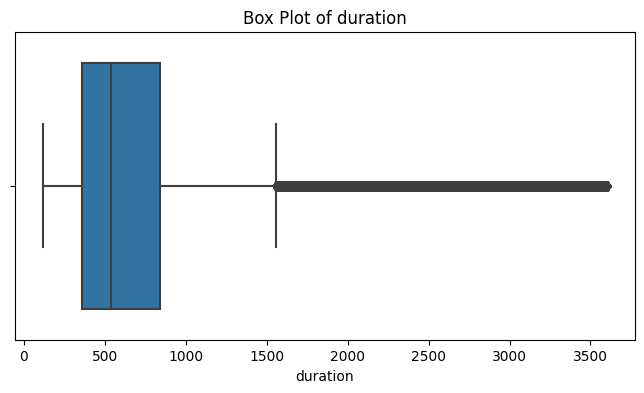

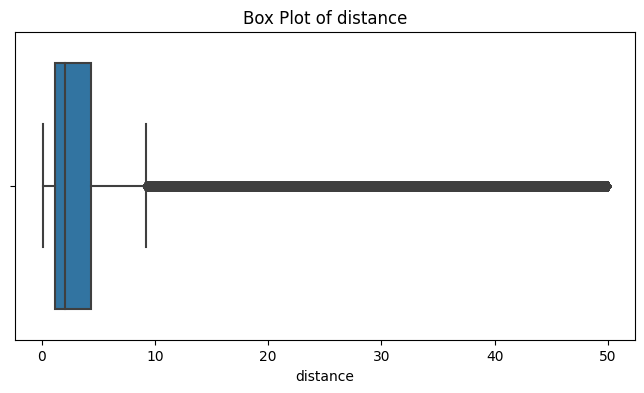

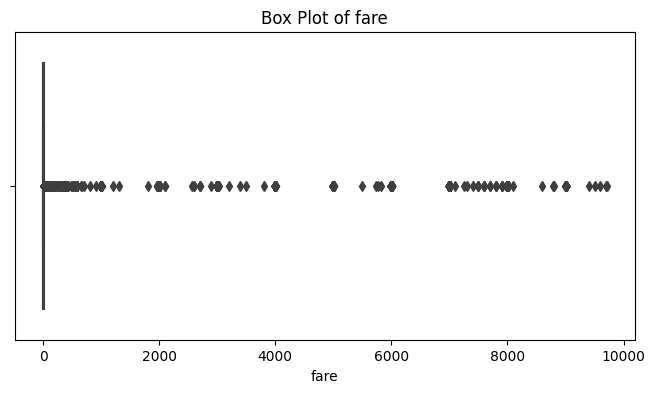

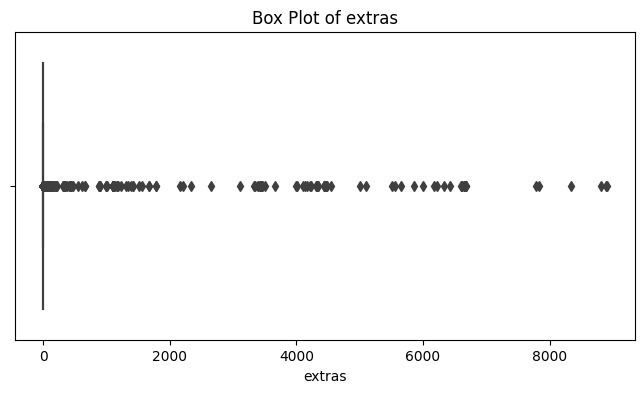

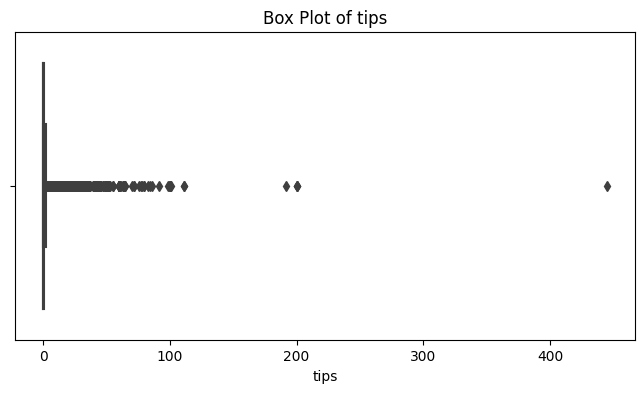

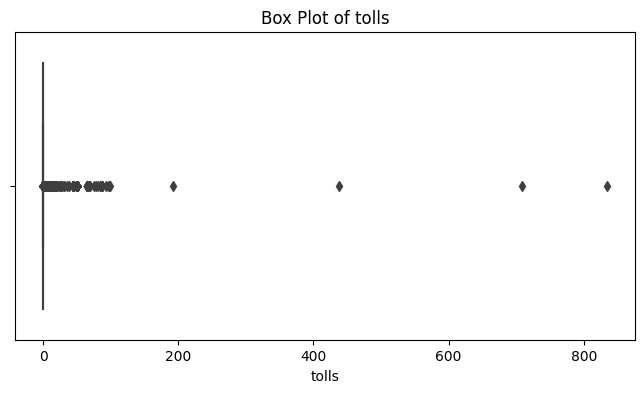

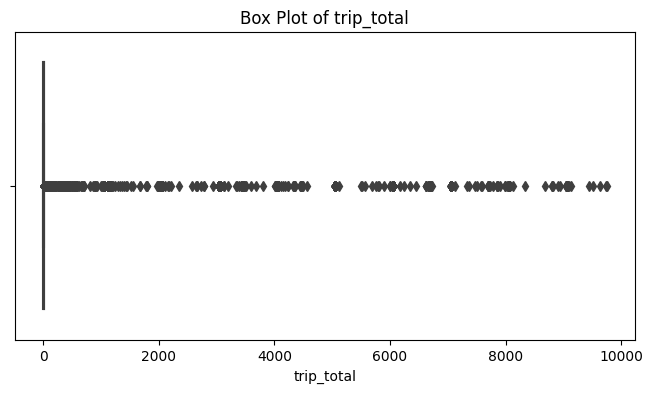

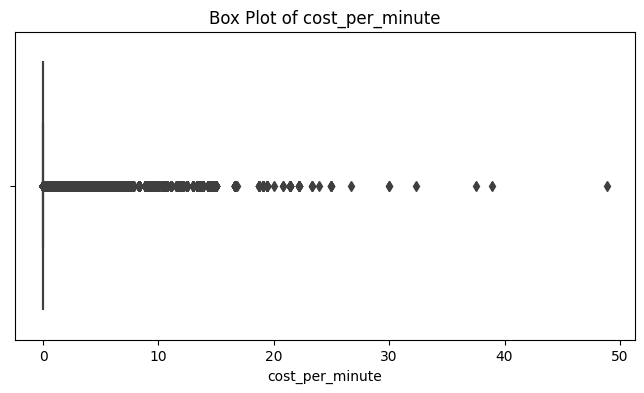

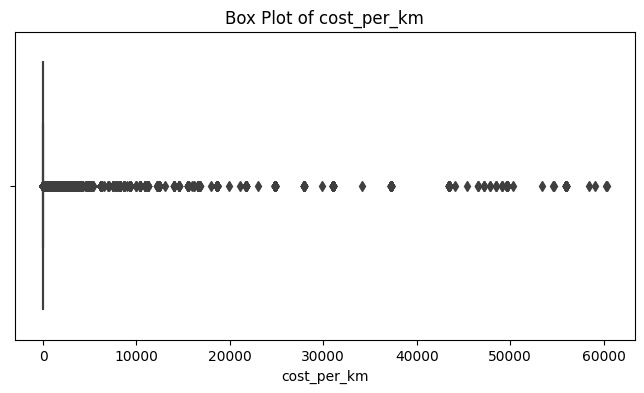

In [19]:
# Define the list of features where we expect to have outliers
features_with_outliers = ['duration', 'distance', 'fare', 'extras', 'tips', 'tolls', 'trip_total', 'cost_per_minute', 'cost_per_km']

# Iterate over the features and plot the box plot for each feature
for feature in features_with_outliers:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_trips[feature])
    plt.title('Box Plot of ' + feature)
    plt.show()


## Outlier Removal
Our EDA reveals the presence of outliers in our features. To prevent these extreme values from distorting our analysis, we decide to remove outliers defined at the 1st and 99th percentiles. This step reduces noise in the data, ensuring a more accurate and meaningful clustering result.


In [20]:
# Initialize a mask where all rows are to be kept
mask = pd.Series([True]*len(df_trips))

features_with_outliers = ['duration', 'distance', 'fare', 'extras', 'tips', 'tolls', 'trip_total','cost_per_minute', 'cost_per_km']
for feature in features_with_outliers:
    # Calculate the 1st percentile (lower threshold) and 99th percentile (upper threshold) of the feature
    feature_1st_percentile = df_trips[feature].quantile(0.001)
    feature_99th_percentile = df_trips[feature].quantile(0.999)

    # Create a new mask for this feature, which is True for rows where the feature value is within the threshold and False otherwise
    feature_mask = (df_trips[feature] >= feature_1st_percentile) & (df_trips[feature] <= feature_99th_percentile)

    # Combine the current mask with the total mask using the AND operator
    mask = mask & feature_mask

# Remove rows where any mask is False (i.e., at least one feature value is outside the thresholds)
df_trips = df_trips[mask]



## Visualizing Features Post-Outlier Removal
After removing the outliers, we visualize our features again to ensure they now present a more representative view of our data. Including all the features for this visualization helps us understand the final form of our data before we proceed to the clustering task.


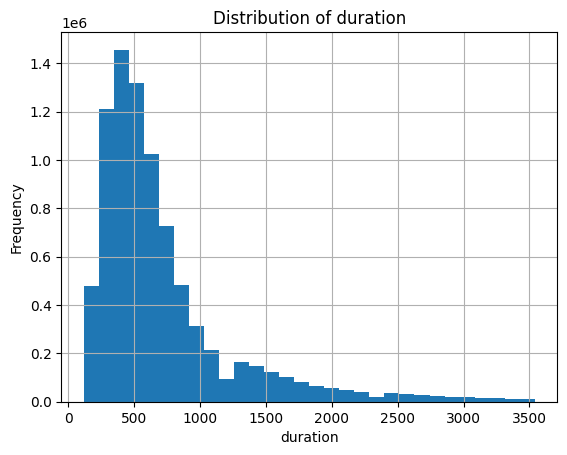

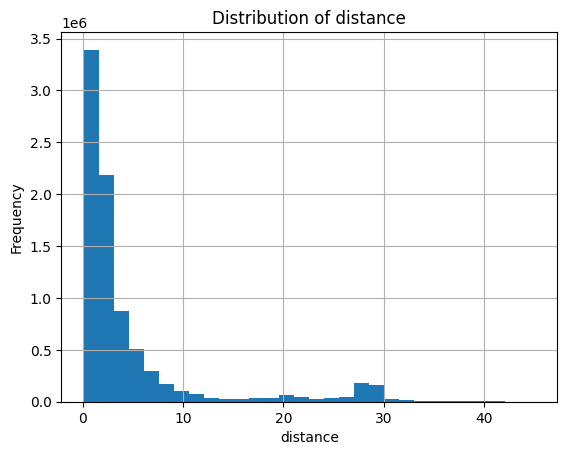

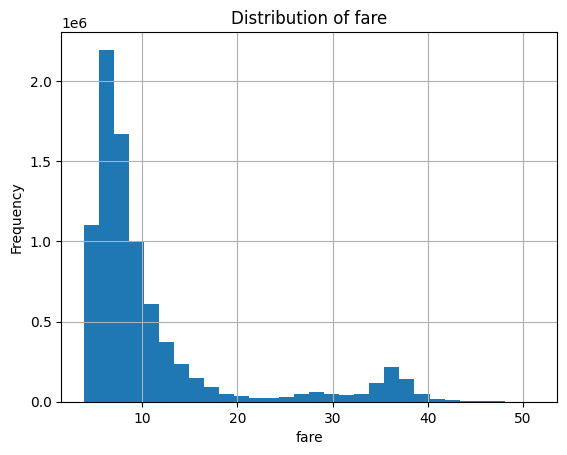

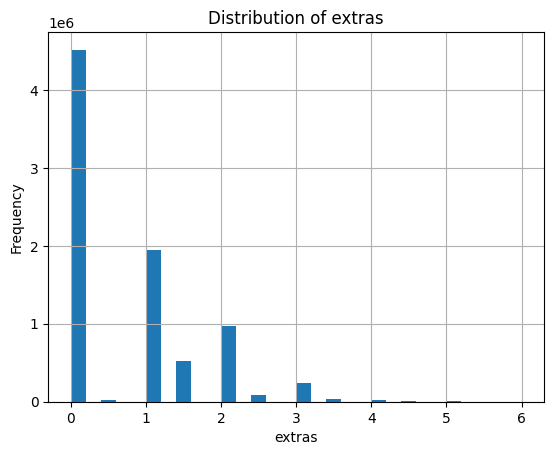

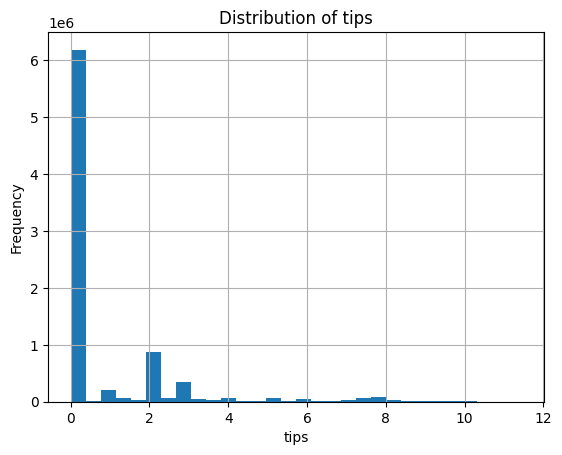

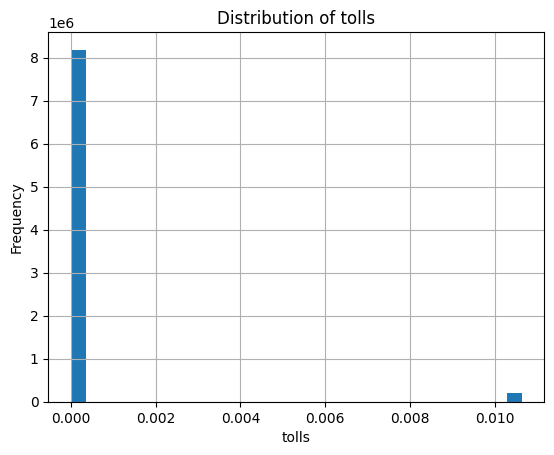

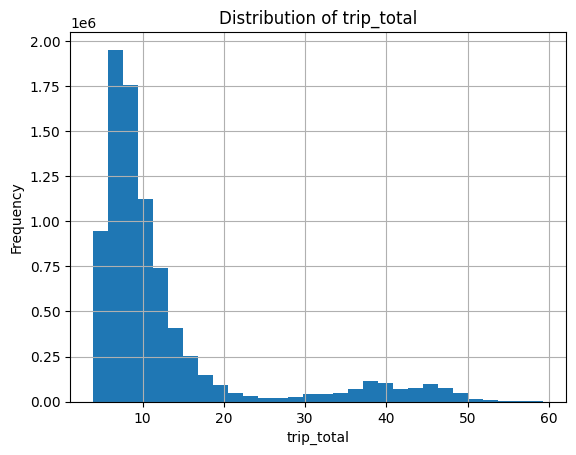

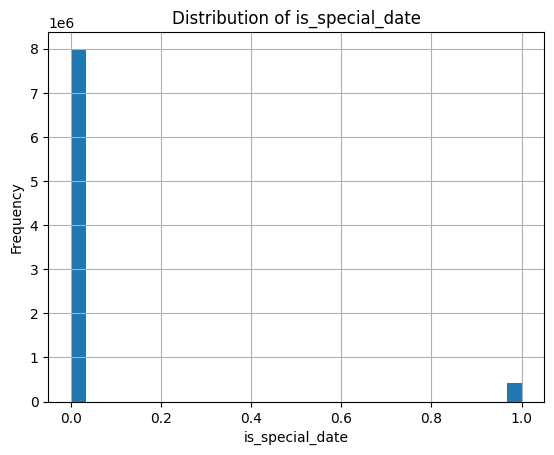

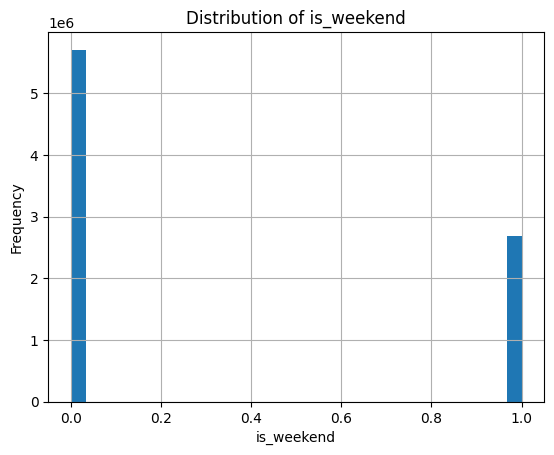

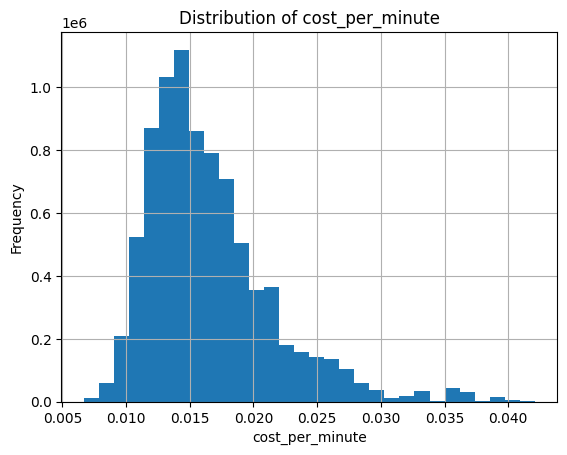

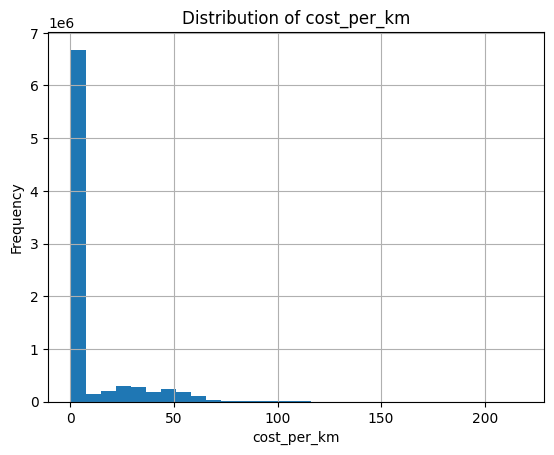

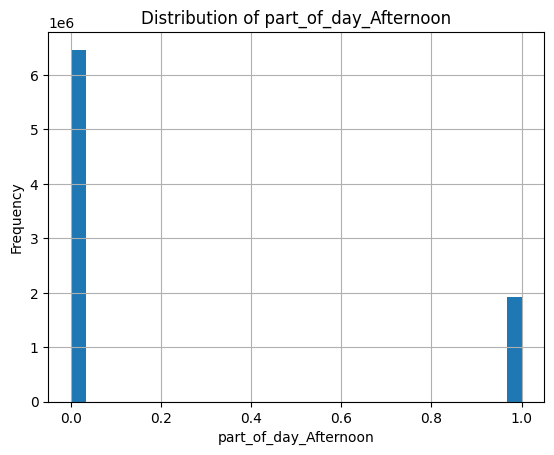

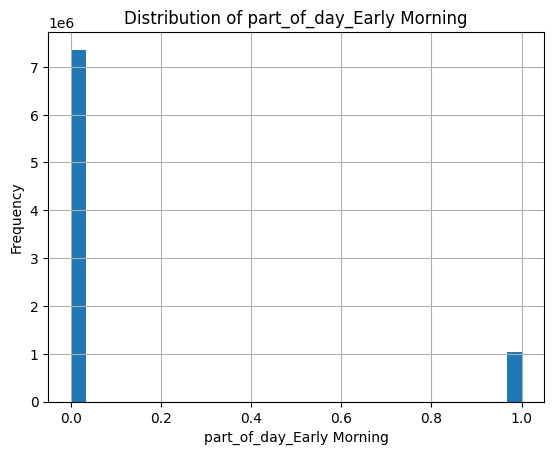

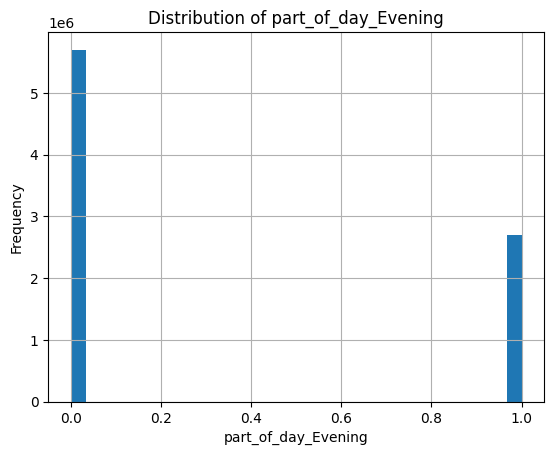

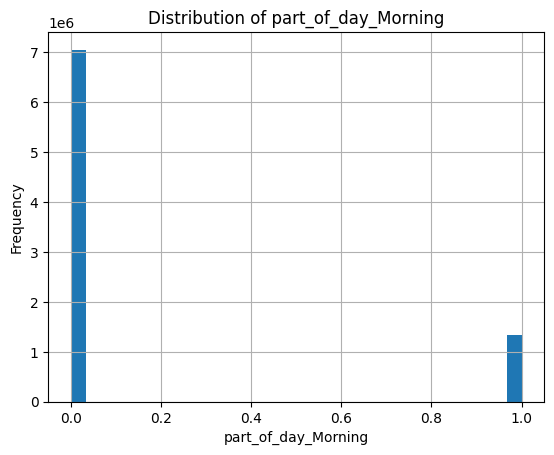

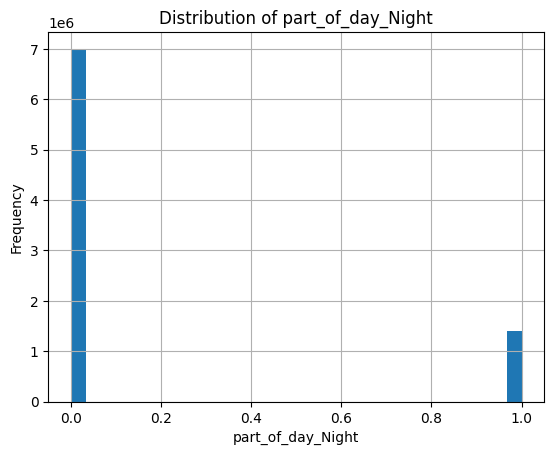

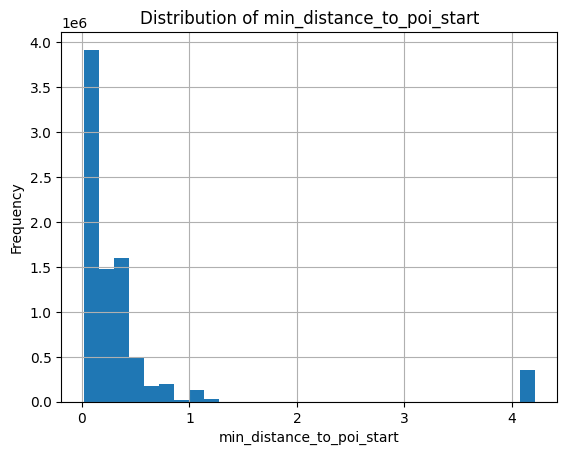

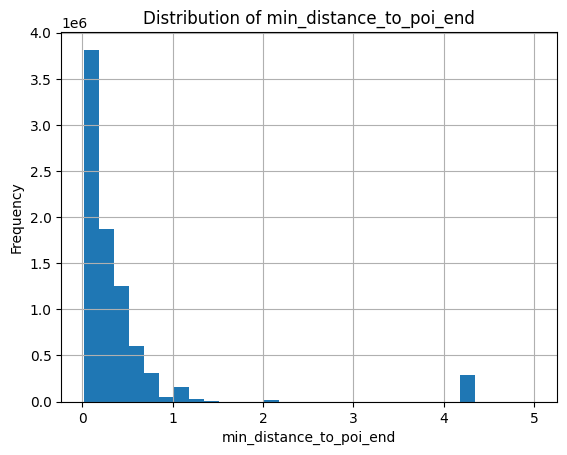

In [21]:
features = ['duration', 'distance', 'fare', 'extras', 'tips', 'tolls', 'trip_total',
            'is_special_date', 'is_weekend', 'cost_per_minute',
            'cost_per_km', 'part_of_day_Afternoon','part_of_day_Early Morning',
            'part_of_day_Evening', 'part_of_day_Morning','part_of_day_Night', 'min_distance_to_poi_start',
            'min_distance_to_poi_end', 'poi_count_start', 'poi_count_end', 'airport_trip']

# Iterate over the features and plot the histogram for each feature
for feature in features:

    # Plot the histogram of the feature
    plt.figure()
    df_trips[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
# Final Dataframe for clustering
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8390871 entries, 0 to 8449591
Data columns (total 29 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   start_time                 datetime64[ns]
 1   end_time                   datetime64[ns]
 2   duration                   float64       
 3   distance                   float64       
 4   start_census_tract         int64         
 5   end_census_tract           int64         
 6   fare                       float64       
 7   extras                     float64       
 8   tips                       float64       
 9   tolls                      float64       
 10  trip_total                 float64       
 11  min_distance_to_poi_start  float64       
 12  min_distance_to_poi_end    float64       
 13  poi_count_start            float64       
 14  poi_count_end              float64       
 15  airport_trip               int64         
 16  is_special_date            int64    

In [23]:
# Save the modified DataFrame as a Pickle file
output_pickle_path = '/content/drive/MyDrive/3A23/Data/trips_2013_extended.pkl'
with open(output_pickle_path, 'wb') as file:
    pickle.dump(df_trips, file)